In [6]:
import numpy as np
from matplotlib import pyplot as plt
from utils import *

In [7]:
true_trajectory, noisy_observations = generate_trajectory_linear()

In [8]:
# Kalman filter

P = np.eye(4)
m = true_trajectory[0]
estimated_trajectory_KF = [m]
Ps = [P]

for y in noisy_observations:
    m_pred = A @ m
    P_pred = A @ P @ A.T + Q
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)
    m = m_pred + K @ (y - H @ m_pred)
    P = P_pred - K @ S @ K.T
    
    Ps.append(P)
    estimated_trajectory_KF.append(m)

Ps = np.array(Ps)
estimated_trajectory_KF = np.array(estimated_trajectory_KF)

In [9]:
# RTS smoother
n, dim_x = estimated_trajectory_KF.shape

estimated_trajectory_RTS, P = estimated_trajectory_KF.copy(), Ps.copy()

for k in range(n-2,-1,-1):
    P_pred = A @ P[k] @ A.T + Q

    G = P[k] @ A.T @ np.linalg.inv(P_pred)
    estimated_trajectory_RTS[k] += G @ (estimated_trajectory_RTS[k+1] - A @ estimated_trajectory_RTS[k])
    #P[k] += (G @ (P[k+1] - P_pred)) @ G.T

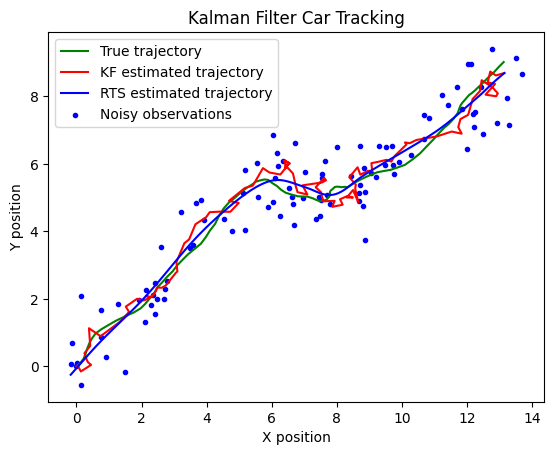

In [10]:
plt.plot(true_trajectory[:, 0], true_trajectory[:, 1], 'g-', label='True trajectory')
plt.plot(estimated_trajectory_KF[:, 0], estimated_trajectory_KF[:, 1], 'r-', label='KF estimated trajectory')
plt.plot(estimated_trajectory_RTS[:, 0], estimated_trajectory_RTS[:, 1], 'b-', label='RTS estimated trajectory')
plt.scatter(noisy_observations[:, 0], noisy_observations[:, 1], c='b', marker='.', label='Noisy observations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.title('Kalman Filter Car Tracking')
plt.show()